# 1. Verificación de calidad de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

M19 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2019.csv')
M20 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2020.csv', encoding='latin1')
M21 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2021.CSV', encoding='latin1')
M22 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2022.CSV', encoding='latin1')
M23 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2023.CSV', encoding='latin1')
M24 = pd.read_csv('/content/drive/MyDrive/DBMA1001B/Datos_molec_2024.csv', encoding='latin1')

dataframes = {'2019': M19, '2020': M20, '2021': M21, '2022': M22, '2023': M23, '2024': M24}

for anio, df in dataframes.items():
    df = df.drop_duplicates()


Mounted at /content/drive


### Describe claramente cada una de las variables, incluyendo su nombre, descripción, tipo y valores posibles que puede tomar y el porcentaje de valores nulos.


P4: ¿Cuántos libros leyó en los últimos doce meses?
Dato: Cuantitativo
Valores posibles: enteros
Porcentaje de valores nulos: 0%

P5: ¿Cuál fue el motivo principal por el que usted leyó el libro(s)?
Dato: Cualitativo
Valores posibles: "por trabajo", "por estudio", "por cultura general o por estar al día", "Por gusto o por entretenimiento", "por religión", otros.
Porcentaje de valores nulos: 0%

P8: ¿El (Los) libro(s) que leyó se encontraba(n) (formato digital/ impresos)?
Dato: Cualitativo
Valores posibles: formato digital, impresos
Porcentaje de valores nulos: 0%

P26: Aproximadamente, ¿cuántos minutos continuos lee algún material de lectura?
Dato: Cuantitativo
Valores posibles: enteros
Porcentaje de valores nulos: 0%

P34_a: ¿Cuándo usted era niño(a) sus padres o tutores lo(a) llevaban a bibliotecas o librerías?
Dato: Cualitativo
Valores posibles: "si", "no", "no recuerda"
Porcentaje de valores nulos: 0%

P34_b: ¿Cuándo usted era niño(a) veía a sus padres o tutores leer?
Dato: Cualitativo
Valores posibles: "si", "no", "no recuerda"
Porcentaje de valores nulos: 0%

P34_d: Aproximadamente, ¿cuántos libros había en su casa durante la infancia?
Dato: Cuantitativo
Valores posibles: "de 1 a 25 libros", "de 26 a 50 libros", "de 51 a 75 libros", "de 76 a 100 libros", "más de 100 libros"
Porcentaje de valores nulos: 0%

P36_c: Cuando usted era niño(a), ¿en su escuela primaria sus maestros lo(a) motivaban para que leyera libros?
Dato: Cualitativo
Valores posibles: si", "no", "no recuerda"
Porcentaje de valores nulos: 0%

# 2.1 Exploración de los datos

In [2]:
from IPython.display import display
#Exploración de datos - Variables cuantitativas P4 y P6

def medidasEstadisticas(df, col):
    return {
        'Minimo': df[col].min(),
        'Q1': df[col].quantile(0.25),
        'Mediana': df[col].median(),
        'Media': df[col].mean(),
        'Q3': df[col].quantile(0.75),
        'Máximo': df[col].max(),
        'Rango Medio': (df[col].max() - df[col].min()) / 2,
        'Desv Est': df[col].std(),
        'CV': df[col].std() / df[col].mean() if df[col].mean() != 0 else 0
    }
estadisticasP4 = pd.DataFrame()
estadisticasP26 = pd.DataFrame()

for anio, df in dataframes.items():
    estadisticasP4[anio] = pd.Series(medidasEstadisticas(df, 'p4'))
    estadisticasP26[anio] = pd.Series(medidasEstadisticas(df, 'p26'))
print("Estadísticas para p4:")
display(estadisticasP4)

print("\nEstadísticas para p26:")
display(estadisticasP26)



Estadísticas para p4:


,2019,2020,2021,2022,2023,2024
Minimo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mediana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Media,1.335354,1.428358,1.563655,1.626984,1.380762,1.274802
Q3,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Máximo,50.000000,60.000000,60.000000,99.000000,80.000000,70.000000
Rango Medio,25.000000,30.000000,30.000000,49.500000,40.000000,35.000000
Desv Est,2.916674,3.433952,4.429735,4.708763,4.039195,3.262826
CV,2.184196,2.404125,2.832936,2.894167,2.925339,2.559478



Estadísticas para p26:


,2019,2020,2021,2022,2023,2024
Minimo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mediana,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
Media,27.541919,28.249254,29.241786,28.450893,27.438878,26.780754
Q3,40.000000,40.000000,40.000000,40.000000,30.000000,30.000000
Máximo,360.000000,480.000000,480.000000,360.000000,480.000000,360.000000
Rango Medio,180.000000,240.000000,240.000000,180.000000,240.000000,180.000000
Desv Est,30.771497,32.966445,35.609356,33.532408,36.932788,32.709740
CV,1.117260,1.166985,1.217756,1.178607,1.346002,1.221390


In [ ]:
#Exploración de datos - Variables cualitativas P5, P8, P34_a, P34_b, P34_d, P36_c
#Tabla de distribución de frecuencia

varCualitativas = ['p5', 'p8_1', 'p34_1', 'p34_2', 'p34_4', 'p36_3']

distribucionFrecuencias = {col: {} for col in varCualitativas}

for anio, df in dataframes.items():
    for col in varCualitativas:
        distribucionFrecuencias[col][anio] = df[col].value_counts().sort_index()

for pregunta, anios in distribucionFrecuencias.items():
        print(f"\n--- Distribución de frecuencias para '{pregunta}' ---")
        for anio, distribucion in anios.items():
            print(f"\nAño {anio}:")
            for valor, frecuencia in distribucion.items():
                print(f"  Valor: {valor}, Frecuencia: {frecuencia}")



--- Distribución de frecuencias para 'p5' ---

Año 2019:
  Valor: 0, Frecuencia: 1170
  Valor: 1, Frecuencia: 87
  Valor: 2, Frecuencia: 98
  Valor: 3, Frecuencia: 185
  Valor: 4, Frecuencia: 341
  Valor: 5, Frecuencia: 84
  Valor: 6, Frecuencia: 15

Año 2020:
  Valor: 0, Frecuencia: 1199
  Valor: 1, Frecuencia: 88
  Valor: 2, Frecuencia: 97
  Valor: 3, Frecuencia: 211
  Valor: 4, Frecuencia: 327
  Valor: 5, Frecuencia: 78
  Valor: 6, Frecuencia: 10

Año 2021:
  Valor: 0, Frecuencia: 1145
  Valor: 1, Frecuencia: 79
  Valor: 2, Frecuencia: 93
  Valor: 3, Frecuencia: 175
  Valor: 4, Frecuencia: 342
  Valor: 5, Frecuencia: 96
  Valor: 6, Frecuencia: 18

Año 2022:
  Valor: 0, Frecuencia: 1176
  Valor: 1, Frecuencia: 94
  Valor: 2, Frecuencia: 89
  Valor: 3, Frecuencia: 185
  Valor: 4, Frecuencia: 365
  Valor: 5, Frecuencia: 95
  Valor: 6, Frecuencia: 12

Año 2023:
  Valor: 0, Frecuencia: 1201
  Valor: 1, Frecuencia: 86
  Valor: 2, Frecuencia: 89
  Valor: 3, Frecuencia: 165
  Valor: 4, Fre

# 2.2 Explora los datos usando herramientas de visualización

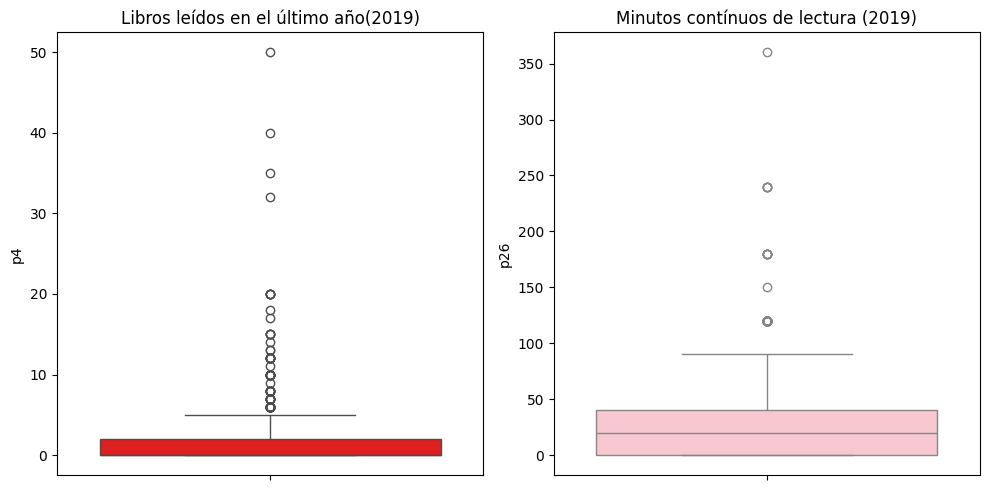

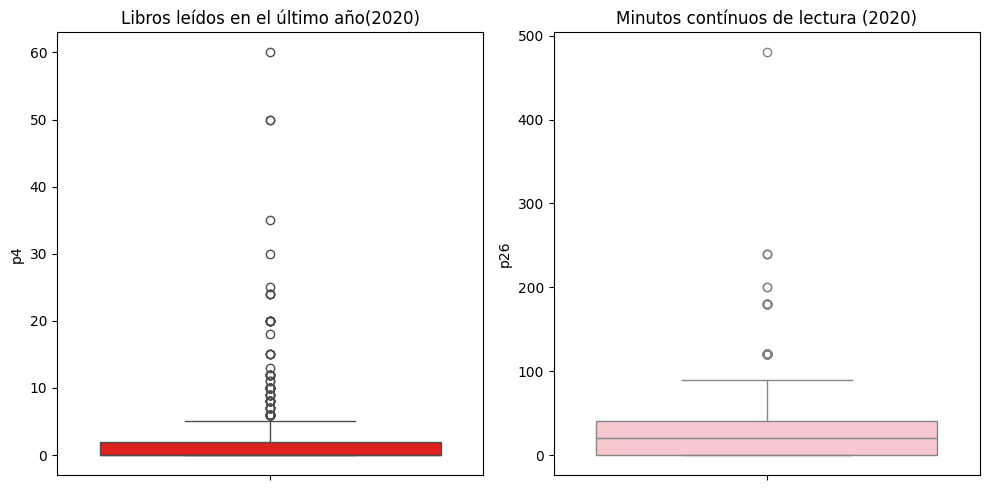

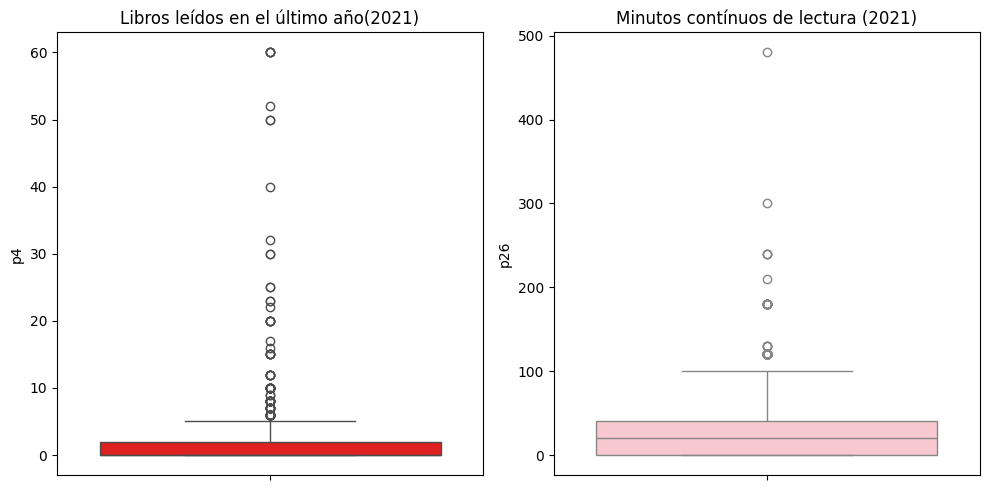

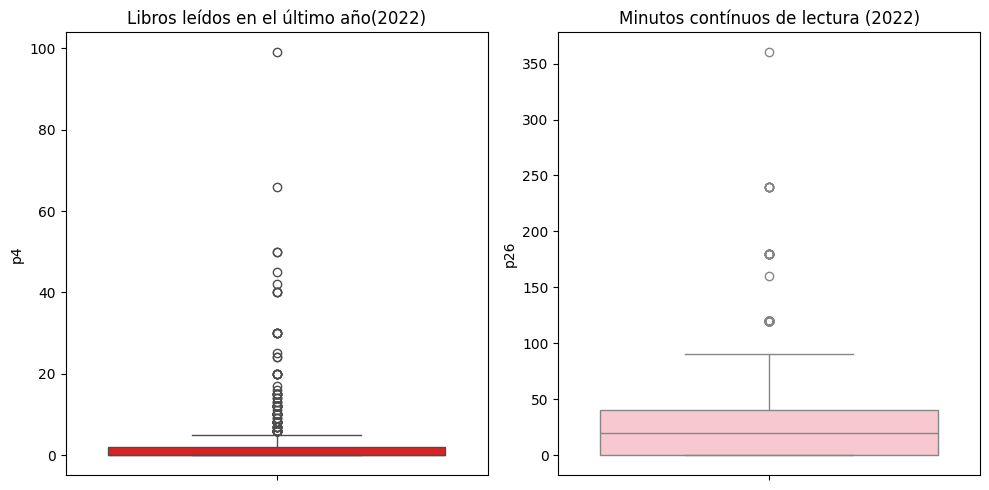

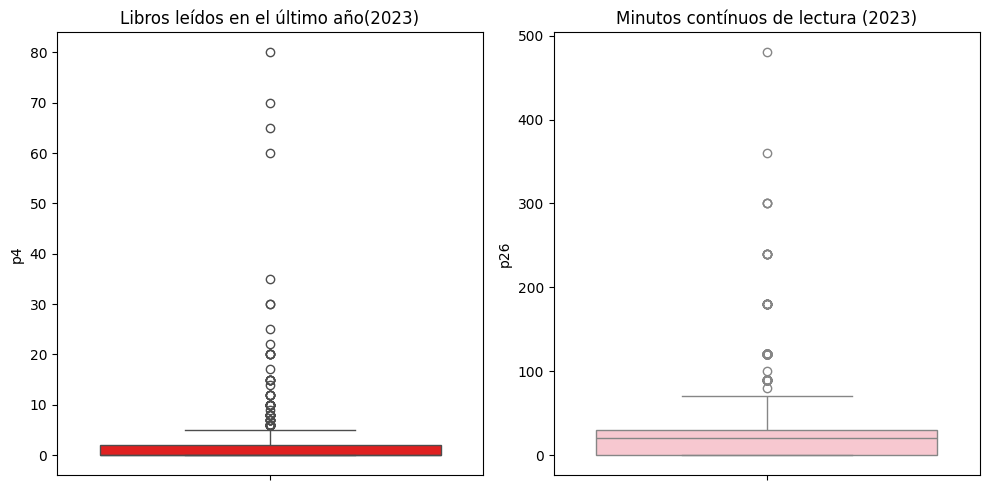

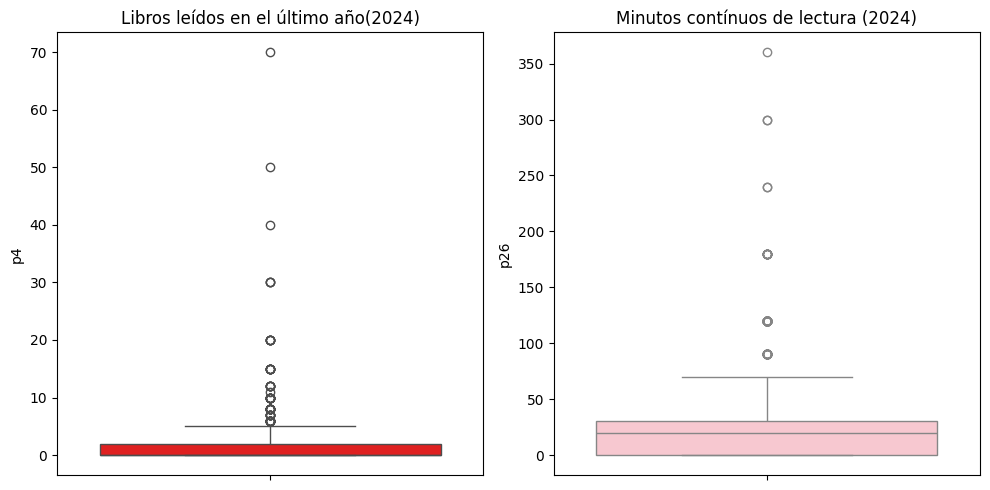

In [ ]:
#Gráficos - Variables cuantitativas P4 y P6
#Medidas de posición no-central: cuartiles, outlier (valores atípicos) que se visualizan en el boxplots
for anio in list(dataframes.keys()):
    df = dataframes[anio]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y='p4', color="red")
    plt.title(f"Libros leídos en el último año({anio})")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y='p26', color="pink")
    plt.title(f"Minutos contínuos de lectura ({anio})")

    plt.tight_layout()
    plt.show()


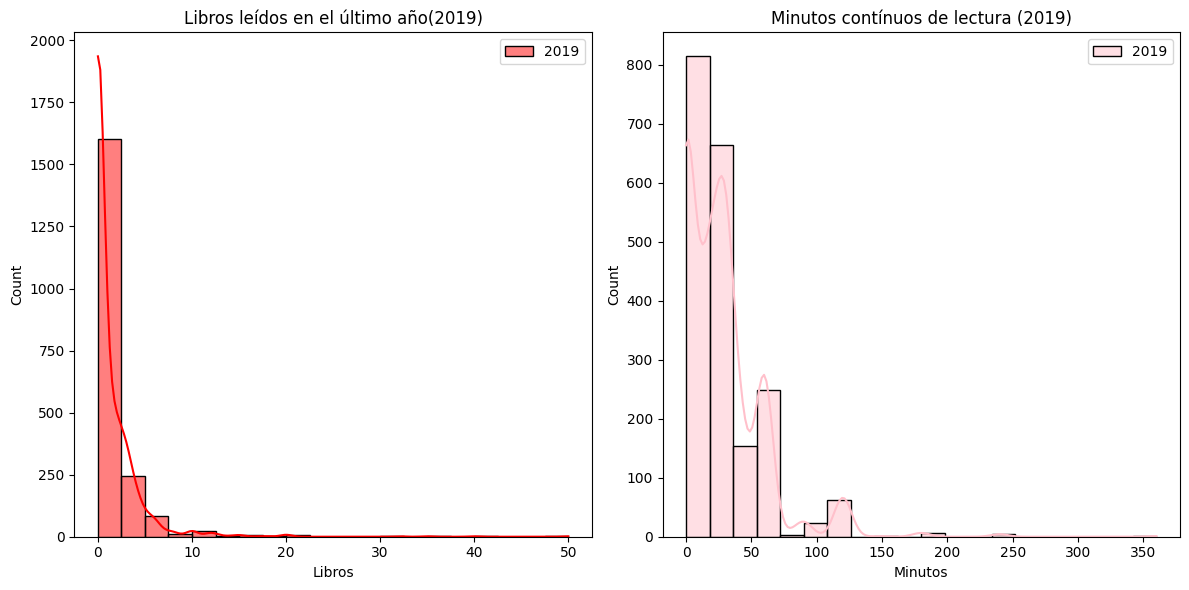

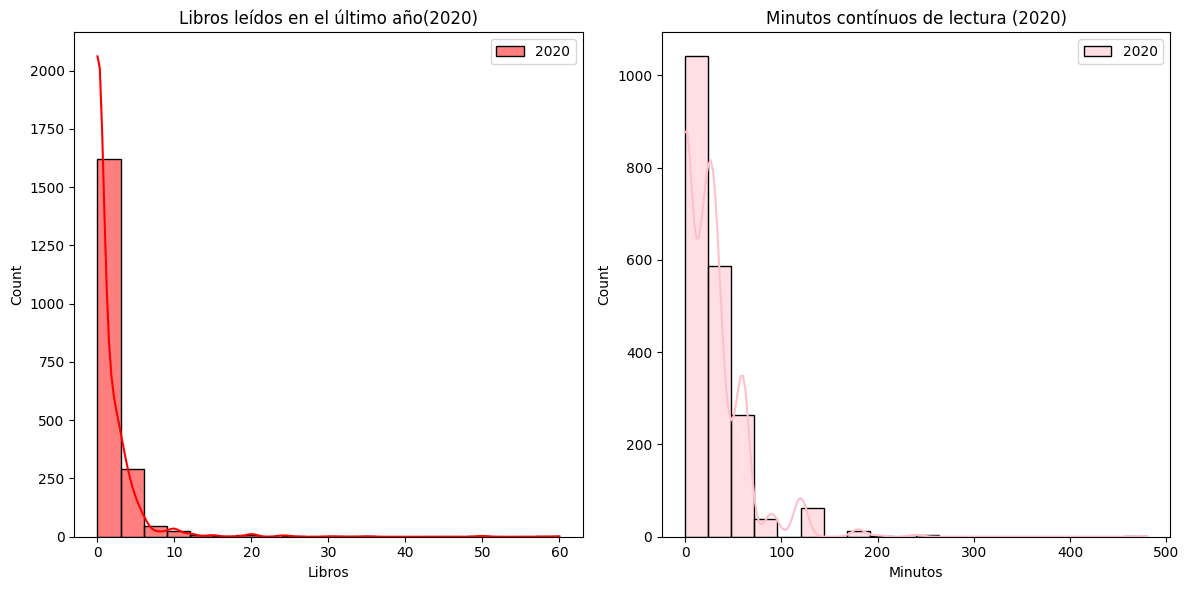

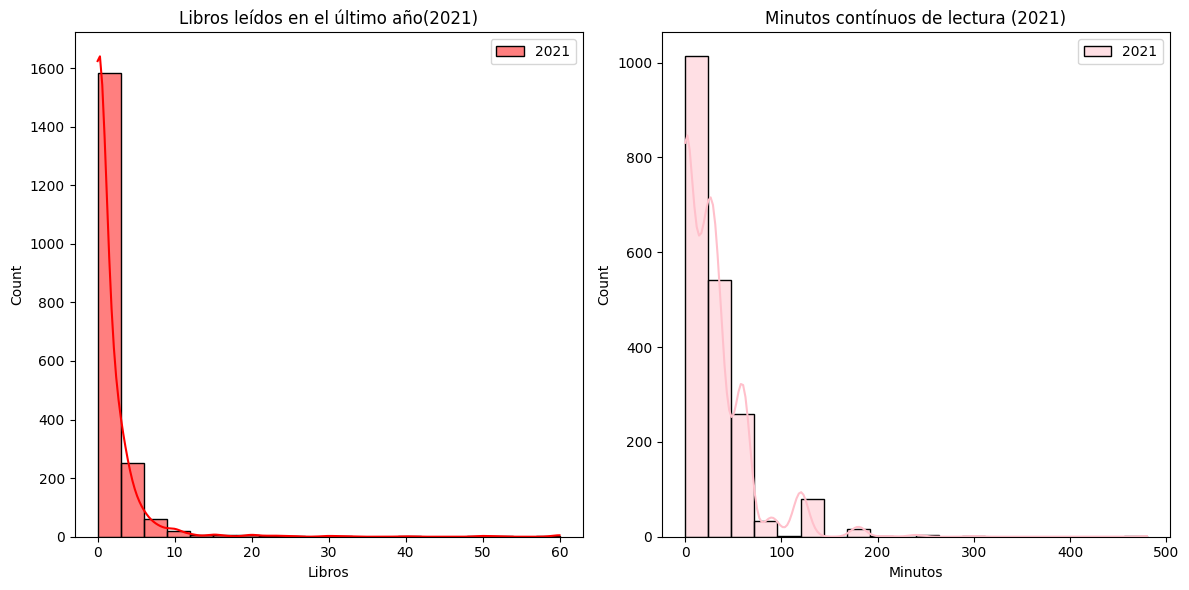

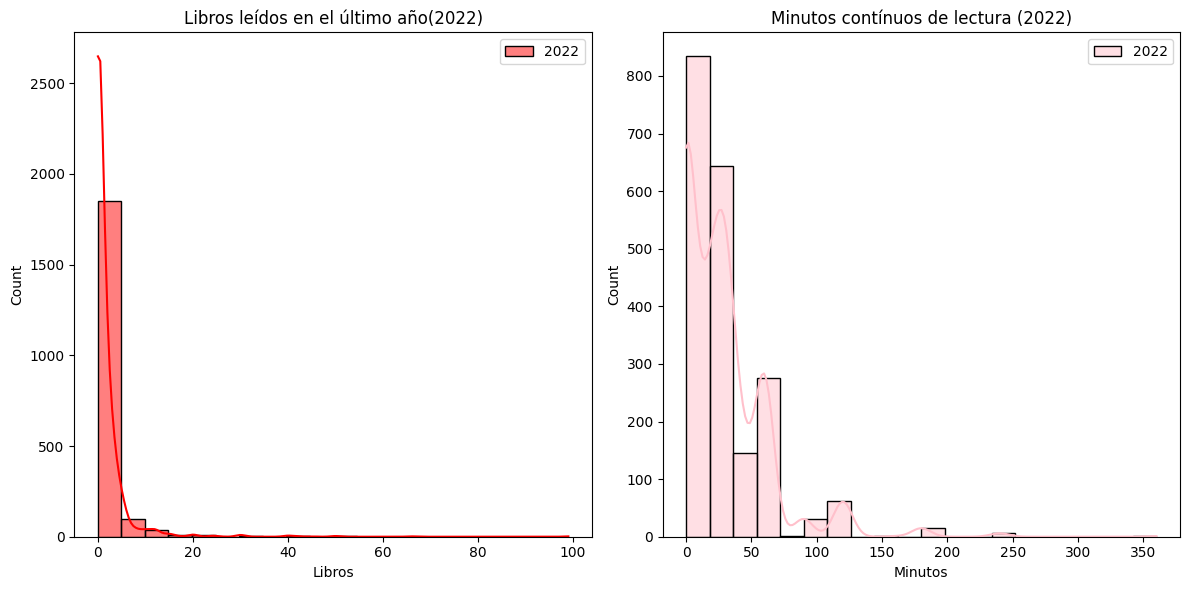

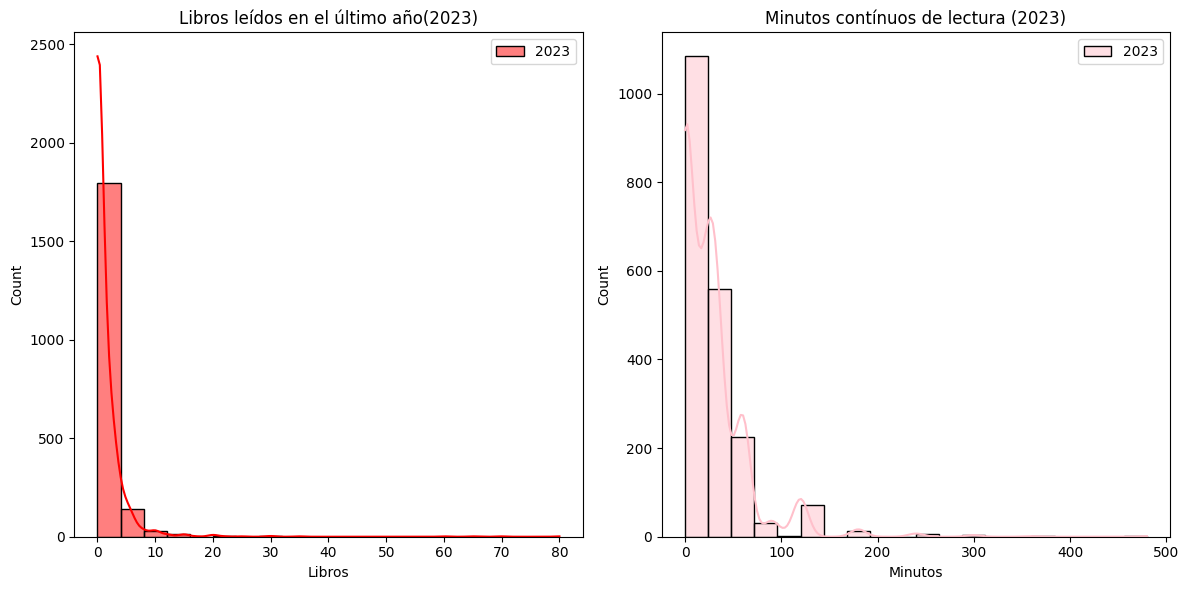

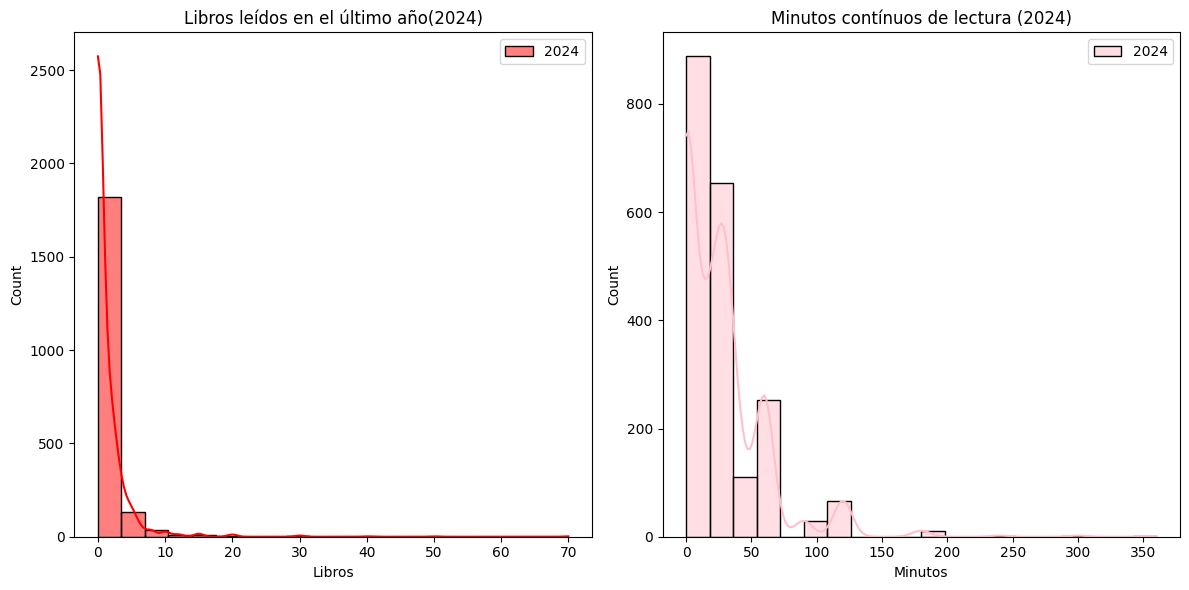

In [ ]:
#Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica y revisar entre qué valores varían los datos, en donde se concentran más los datos
for anio in list(dataframes.keys()):
    df = dataframes[anio]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['p4'], kde=True, label=anio, bins=20, color="red")
    plt.title(f"Libros leídos en el último año({anio})")
    plt.xlabel("Libros")
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(df['p26'], kde=True, label=anio, bins=20, color="pink")
    plt.title(f"Minutos contínuos de lectura ({anio})")
    plt.xlabel("Minutos")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
#Análisis de correlación  de los datos para ver si dos variables cuantitativas están relacionadas linealmente entre sí
for anio, df in dataframes.items():
    corr, _ = pearsonr(df['p4'], df['p26'])
    print(f"Correlación entre p4 y p26 en {anio}: {corr:.2f}")



Correlación entre p4 y p26 en 2019: 0.49
Correlación entre p4 y p26 en 2020: 0.44
Correlación entre p4 y p26 en 2021: 0.41
Correlación entre p4 y p26 en 2022: 0.39
Correlación entre p4 y p26 en 2023: 0.42
Correlación entre p4 y p26 en 2024: 0.50


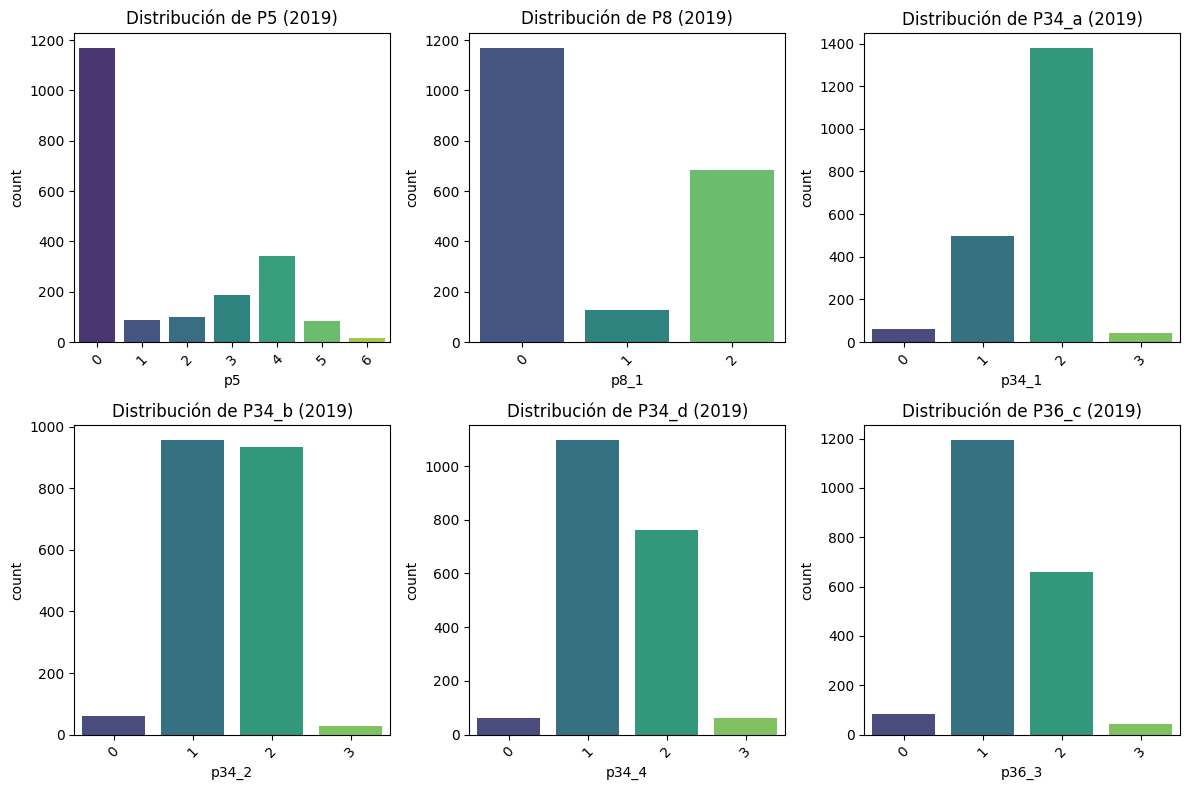

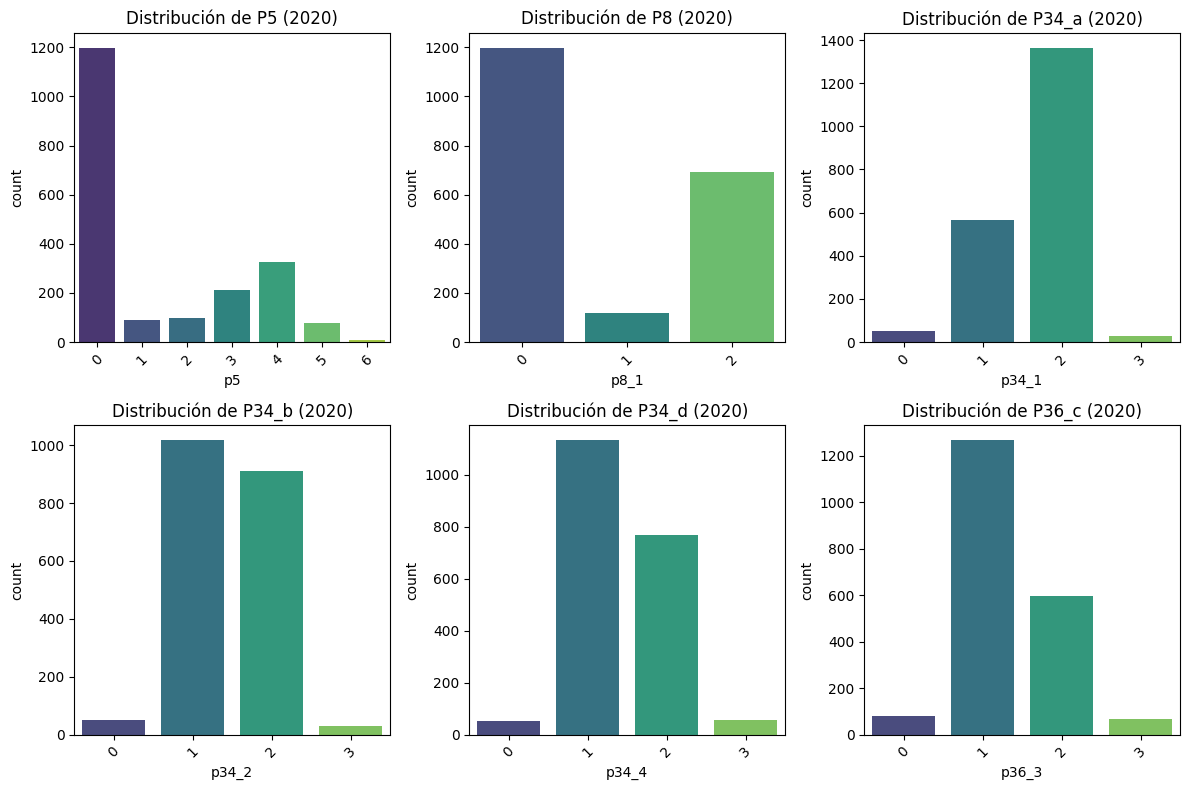

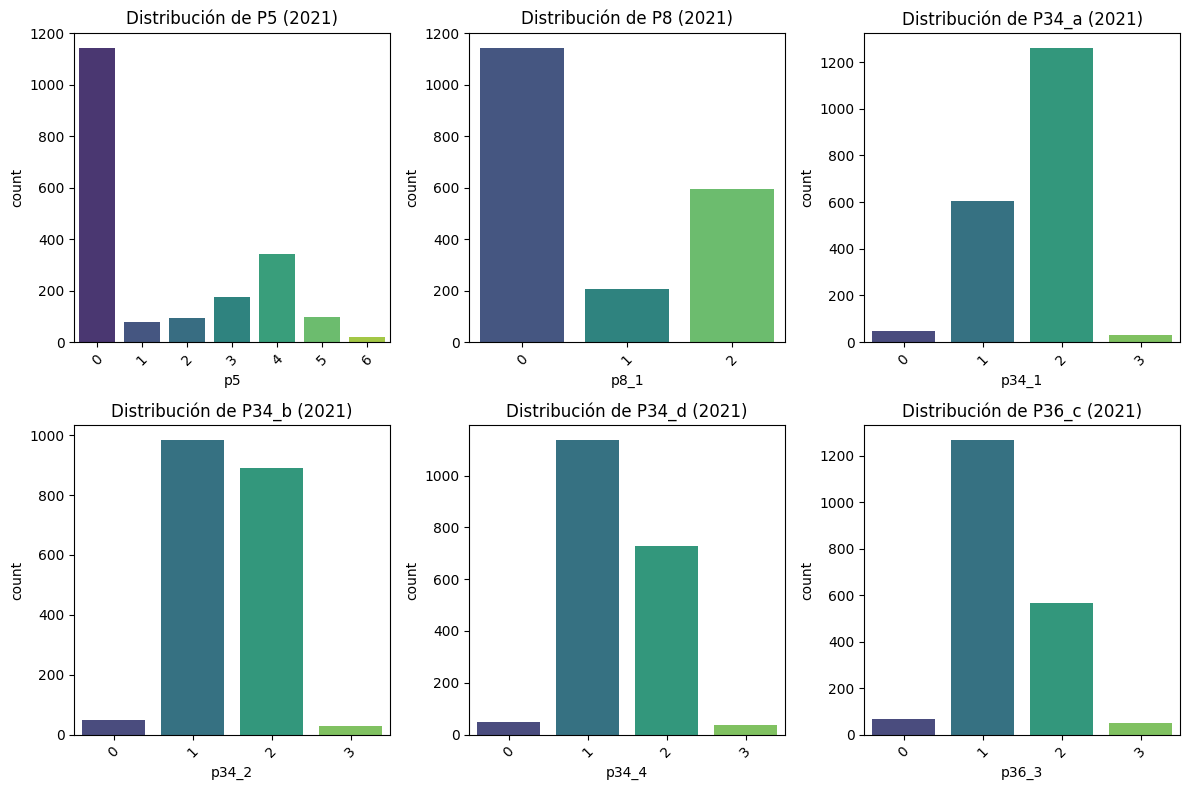

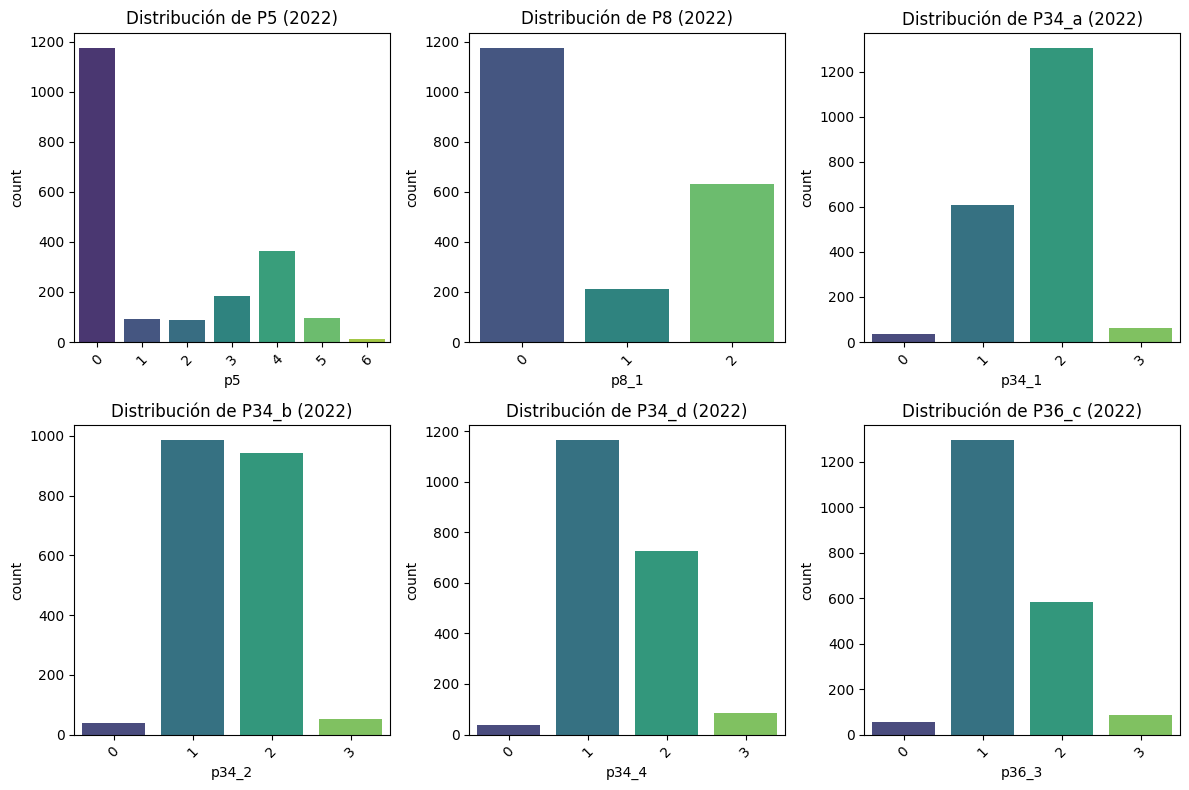

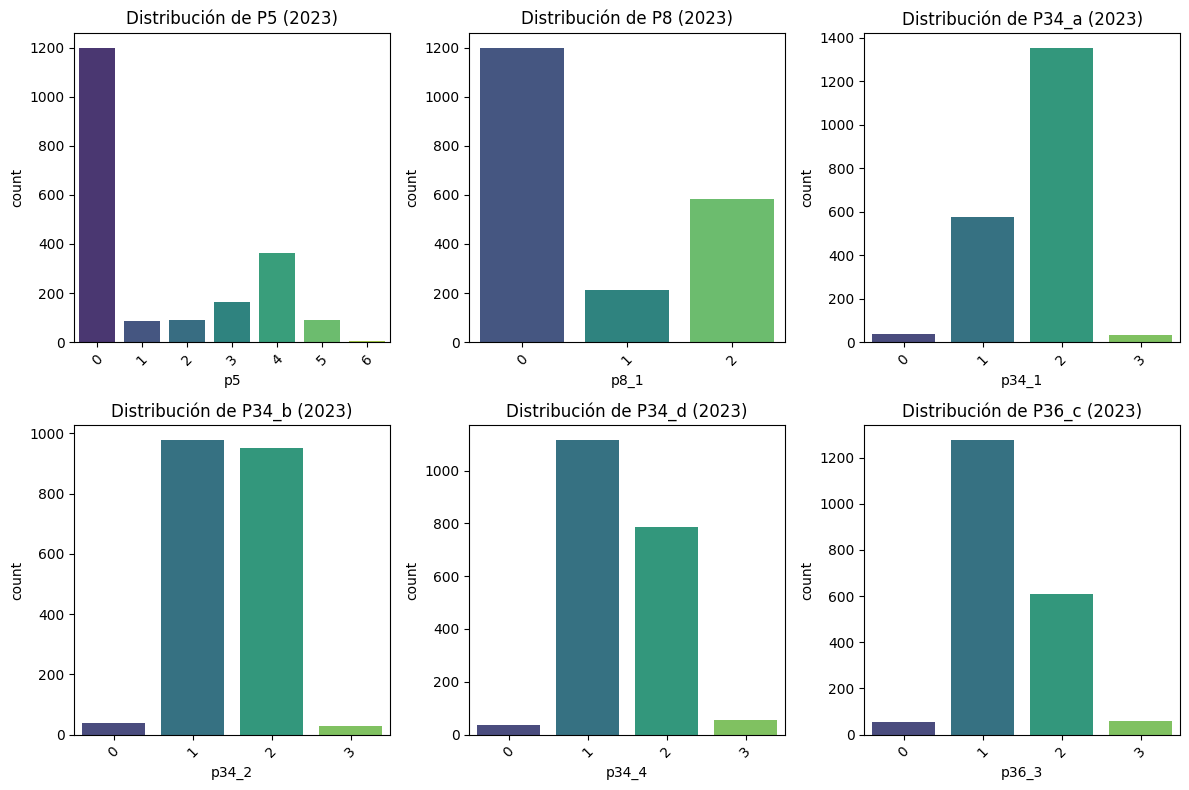

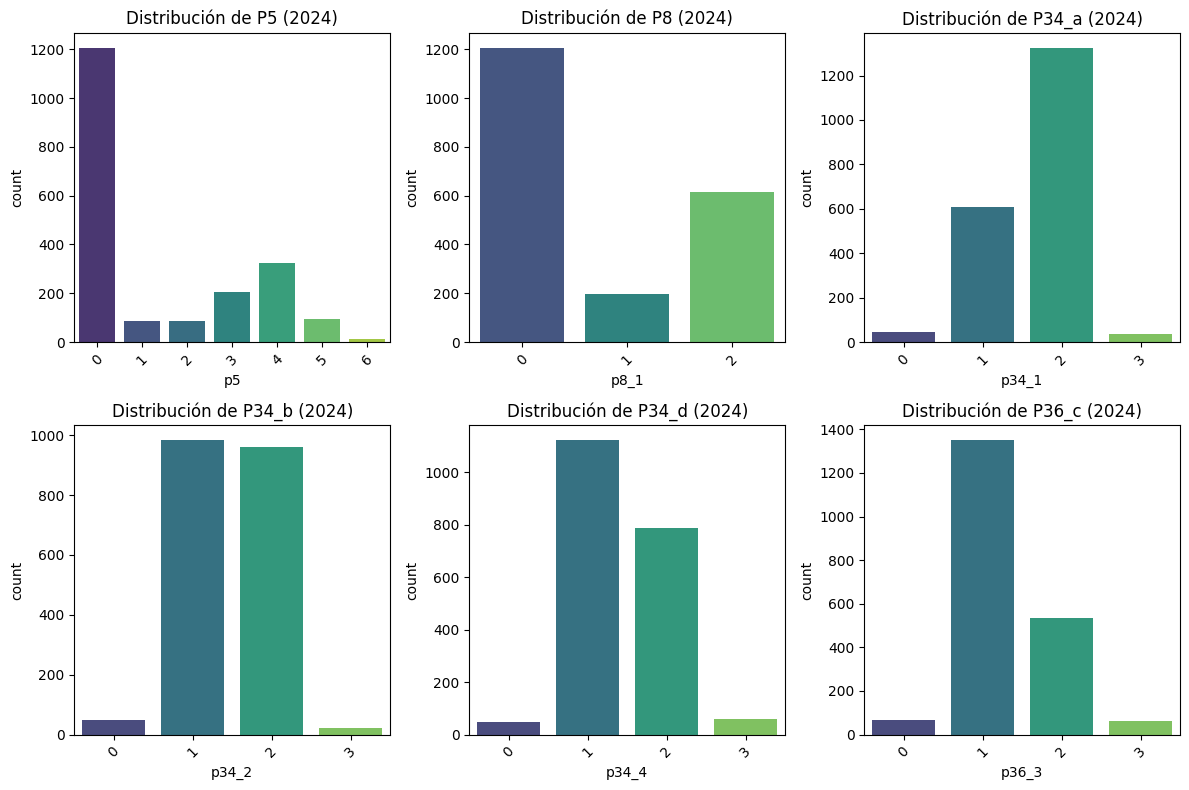

In [ ]:
#Gráficos - Variables cualitativas P5, P8, P34_a, P34_b, P34_d, P36_c
#Distribución de los datos (diagramas de barras, diagramas de pastel)

for anio, df in dataframes.items():
    # Gráficos de barras
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    sns.countplot(data=df, x='p5', palette='viridis')
    plt.title(f'Distribución de P5 ({anio})')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 2)
    sns.countplot(data=df, x='p8_1', palette='viridis')
    plt.title(f'Distribución de P8 ({anio})')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 3)
    sns.countplot(data=df, x='p34_1', palette='viridis')
    plt.title(f'Distribución de P34_a ({anio})')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 4)
    sns.countplot(data=df, x='p34_2', palette='viridis')
    plt.title(f'Distribución de P34_b ({anio})')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 5)
    sns.countplot(data=df, x='p34_4', palette='viridis')
    plt.title(f'Distribución de P34_d ({anio})')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 6)
    sns.countplot(data=df, x='p36_3', palette='viridis')
    plt.title(f'Distribución de P36_c ({anio})')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()





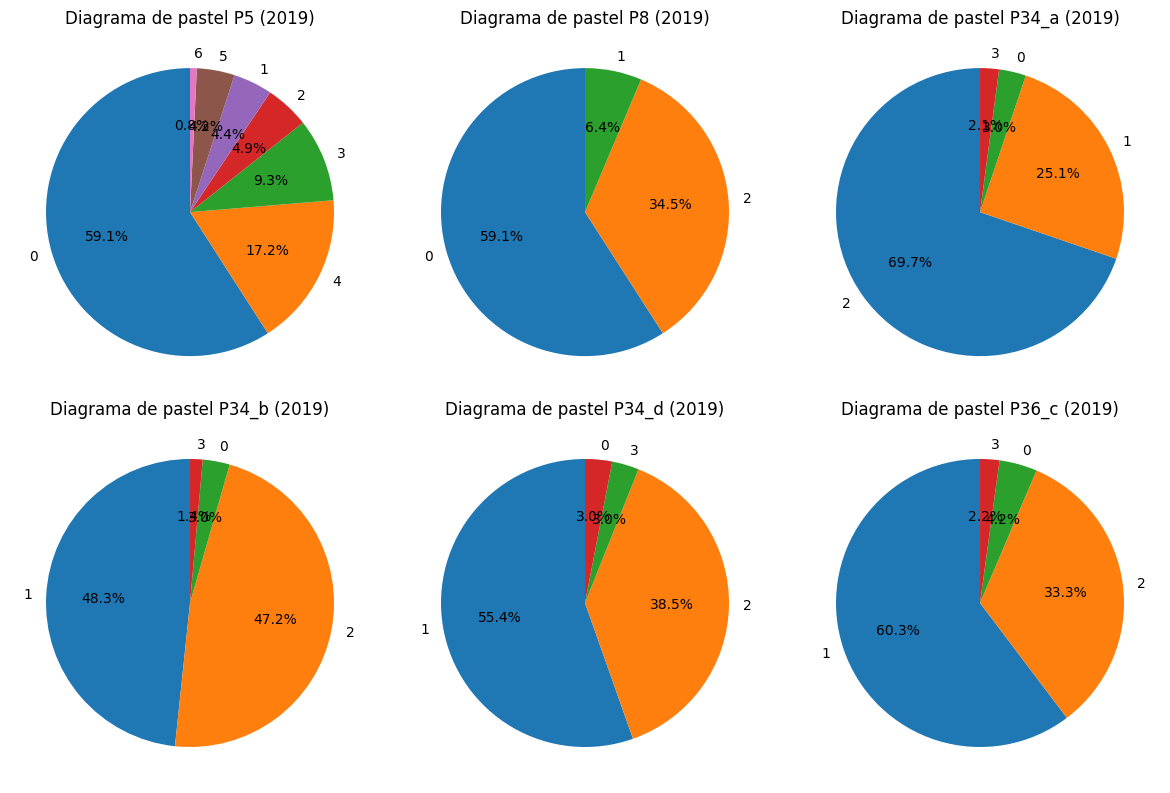

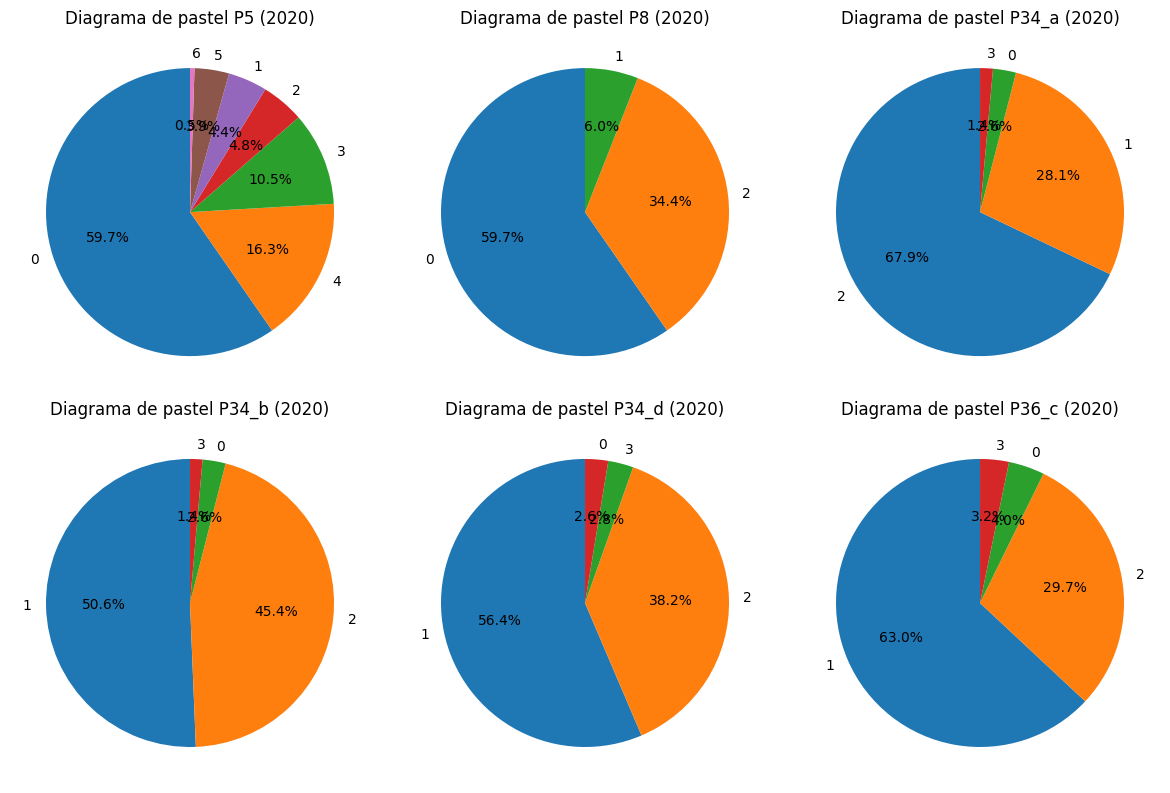

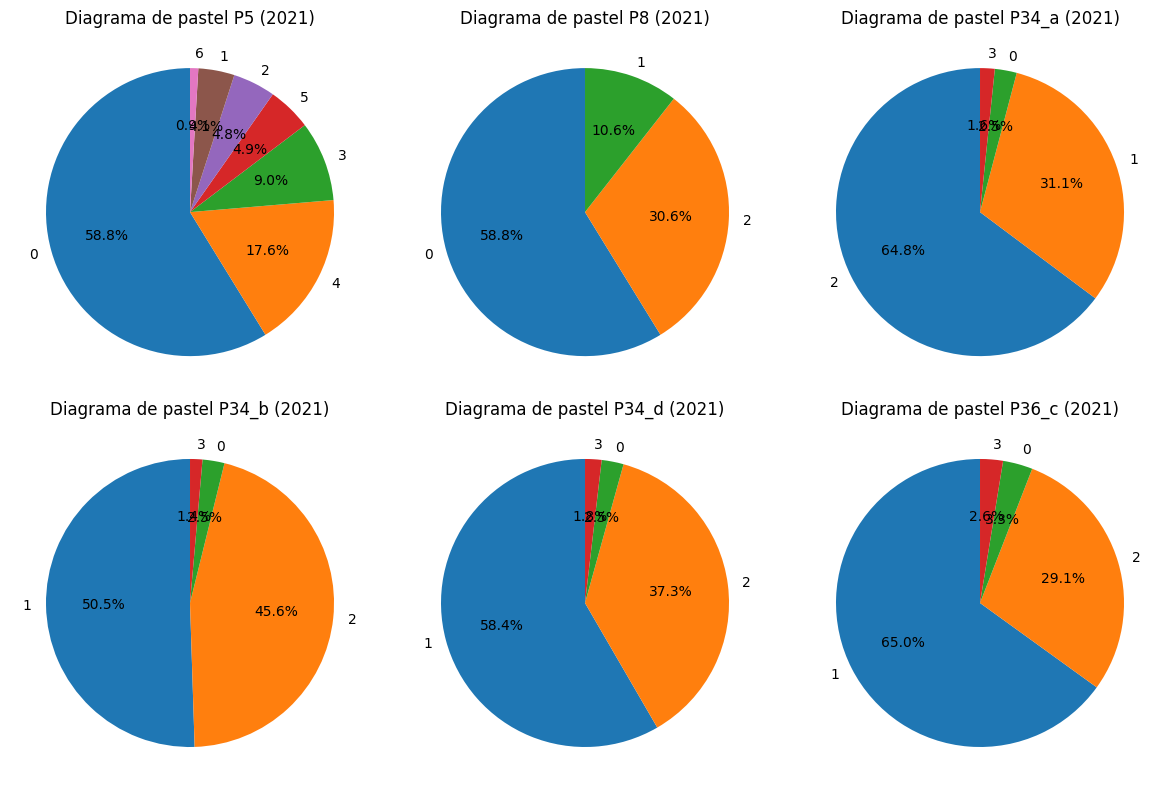

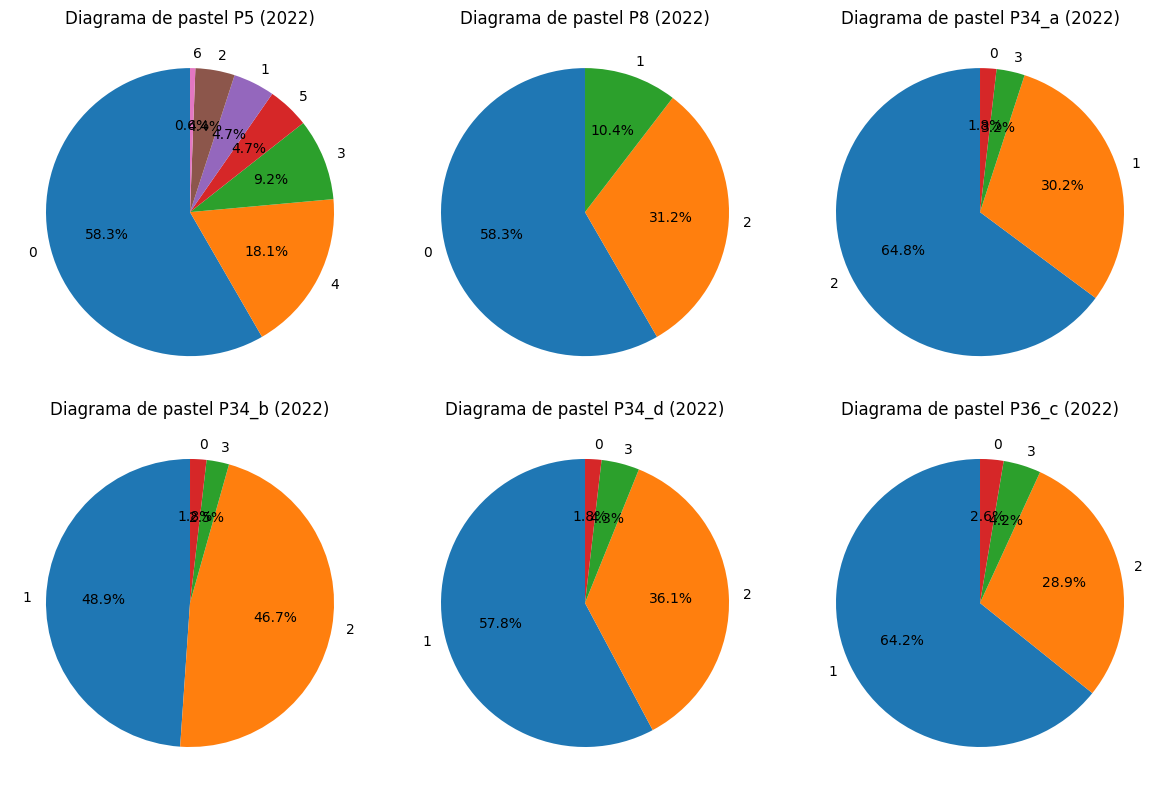

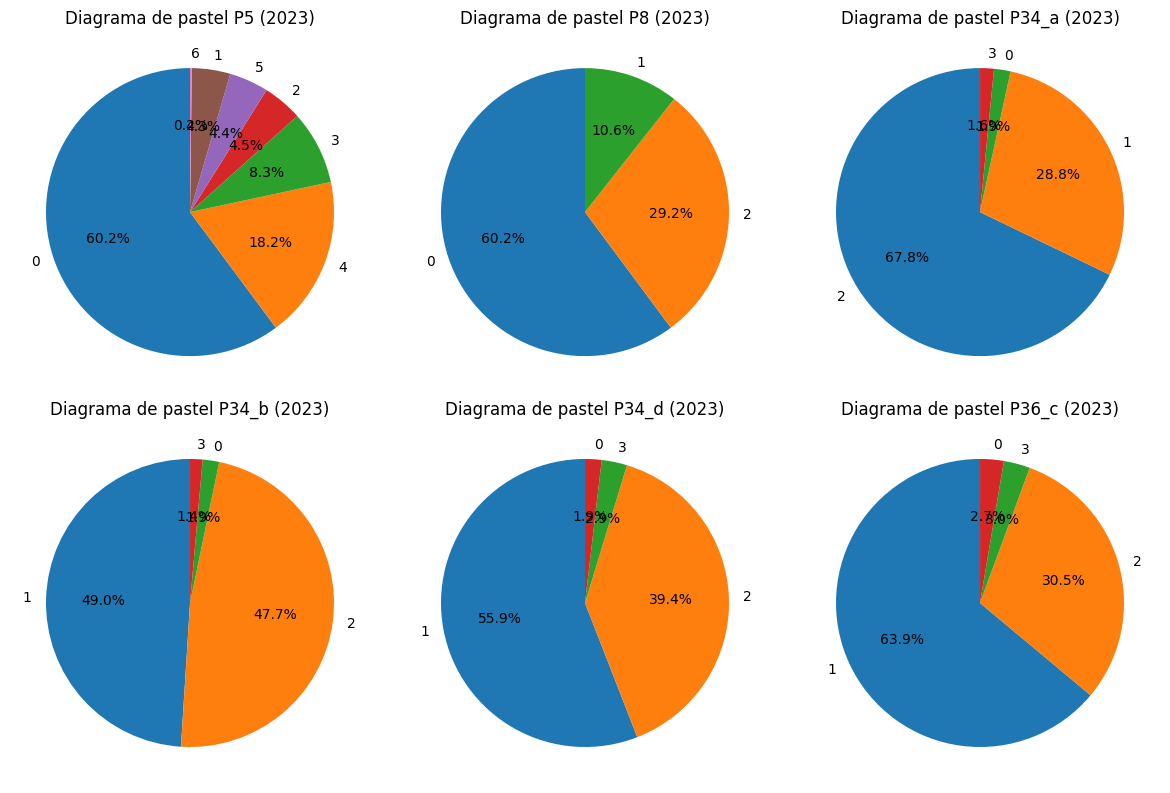

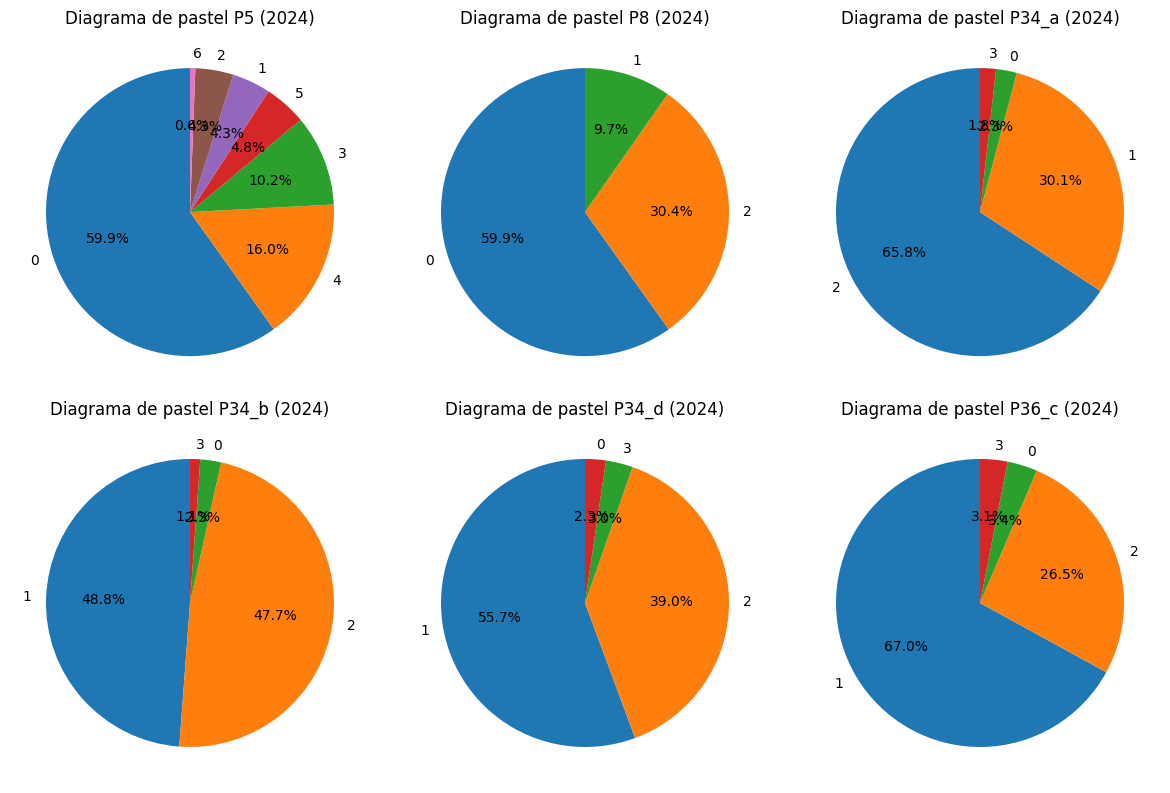

In [ ]:
# Gráficos de pastel
for anio, df in dataframes.items():
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    df['p5'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P5 ({anio})')
    plt.ylabel('')

    plt.subplot(2, 3, 2)
    df['p8_1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P8 ({anio})')
    plt.ylabel('')

    plt.subplot(2, 3, 3)
    df['p34_1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P34_a ({anio})')
    plt.ylabel('')

    plt.subplot(2, 3, 4)
    df['p34_2'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P34_b ({anio})')
    plt.ylabel('')

    plt.subplot(2, 3, 5)
    df['p34_4'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P34_d ({anio})')
    plt.ylabel('')

    plt.subplot(2, 3, 6)
    df['p36_3'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de pastel P36_c ({anio})')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

# 2.3 Vinculación de datos categóricos con numéricos


In [3]:
#Calcula las medidas de las variables cuantitativas por categoría de alguna variable categórica de interés
media_dict = {}
desvest_dict = {}
maximo_dict = {}

for anio, df in dataframes.items():
    media_dict[anio] = df.groupby('p34_2')['p4'].mean()
    desvest_dict[anio] = df.groupby('p34_2')['p4'].std()
    maximo_dict[anio] = df.groupby('p34_2')['p4'].max()


media_df = pd.DataFrame(media_dict)
desvest_df = pd.DataFrame(desvest_dict)
maximo_df = pd.DataFrame(maximo_dict)

etiquetas = ["En blanco","Si","No","No recuerda" ]
media_df.index = etiquetas
desvest_df.index=etiquetas
maximo_df.index=etiquetas

maximo_df = maximo_df.round(2)
print("Media de libros leídos vs veía a padres o tutores leer \n")
display(media_df)
print("\nDesv Estándar de libros leídos vs veía a padres o tutores leer \n")
display(desvest_df)
print("\nMáximo de libros leídos vs veía a padres o tutores leer \n")
display(maximo_df)

Media de libros leídos vs veía a padres o tutores leer 



,2019,2020,2021,2022,2023,2024
En blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Si,1.785789,2.078585,2.146341,2.131846,1.888548,1.763211
No,0.975401,0.803728,1.007874,1.130573,0.944386,0.852391
No recuerda,0.821429,0.785714,1.407407,2.215686,0.321429,0.652174



Desv Estándar de libros leídos vs veía a padres o tutores leer 



,2019,2020,2021,2022,2023,2024
En blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Si,3.007502,4.339990,4.824586,4.548761,4.766057,3.779237
No,2.843987,1.963964,4.017269,4.532201,3.205505,2.677816
No recuerda,2.749459,2.079123,3.201673,9.347328,1.188013,1.152416



Máximo de libros leídos vs veía a padres o tutores leer 



,2019,2020,2021,2022,2023,2024
En blanco,0,0,0,0,0,0
Si,40,60,60,50,80,70
No,50,20,60,99,65,50
No recuerda,13,10,15,66,6,5


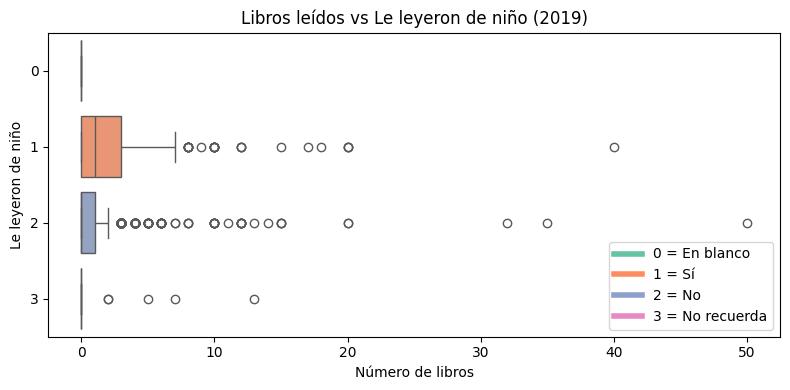

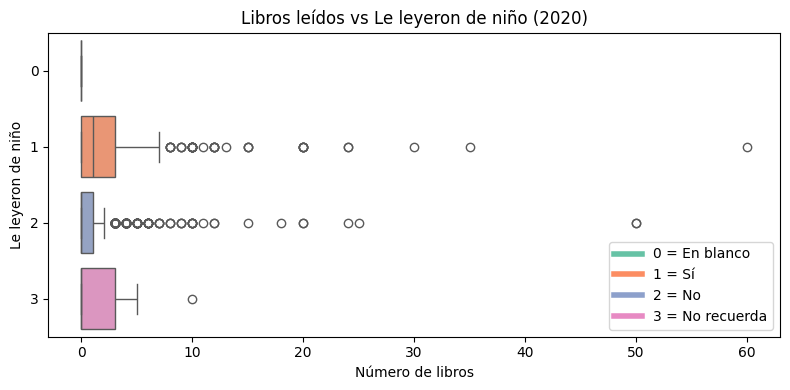

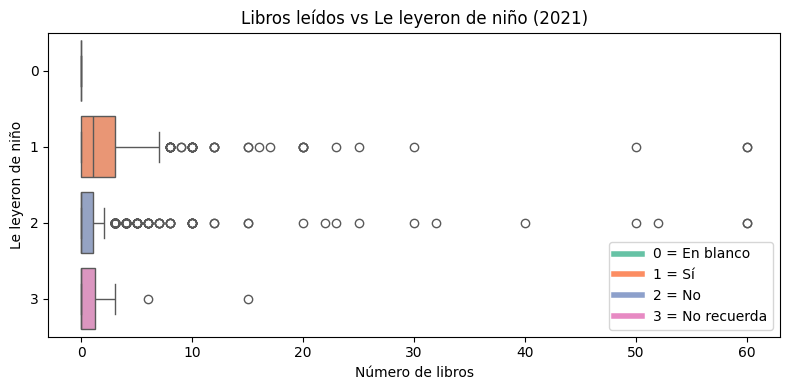

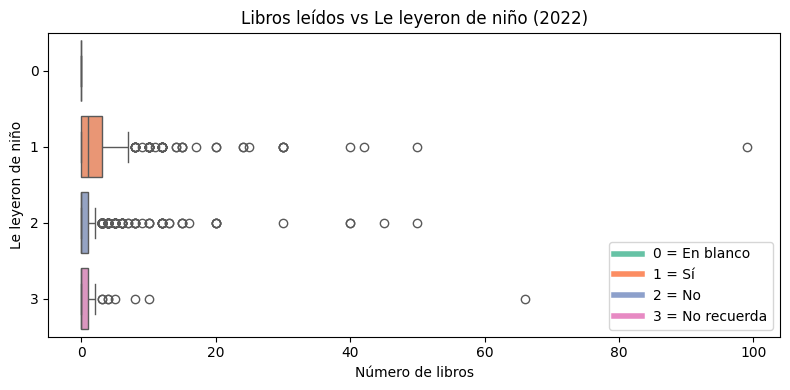

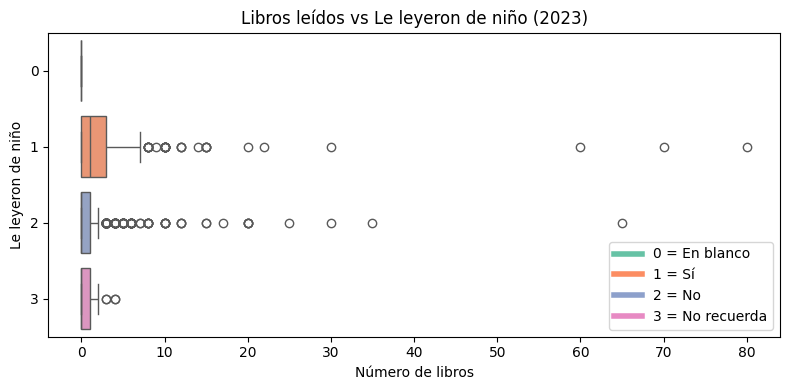

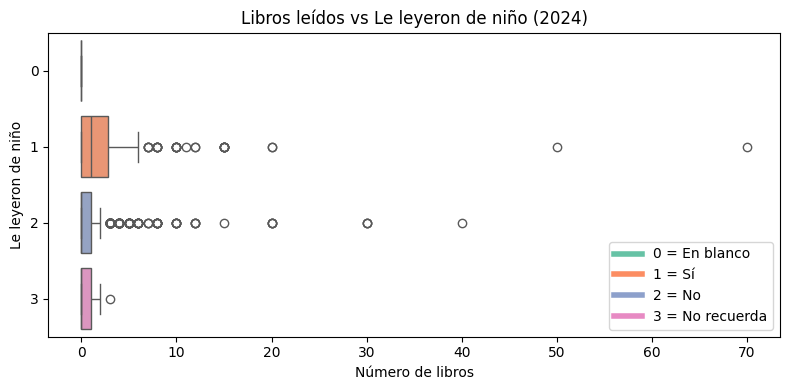

In [ ]:
#Elabora gráficos de caja y bigote de las variables cuantitativas por - categoría de alguna variable categórica de interés
leyenda = {
    0: "En blanco",
    1: "Sí",
    2: "No",
    3: "No recuerda"
}
colores = sns.color_palette("Set2", 4)
for anio, df in dataframes.items():
    plt.figure(figsize=(8, 4))

    sns.boxplot(x='p4', y='p34_3', data=df, palette=colores, orient='h')
    plt.title(f"Libros leídos vs Le leyeron de niño ({anio})")
    plt.xlabel("Número de libros")
    plt.ylabel("Le leyeron de niño")
    plt.legend(handles=[plt.Line2D([0], [0], color=colores[i], lw=4, label=f"{i} = {leyenda[i]}") for i in leyenda], loc='lower right')

    plt.tight_layout()
    plt.show()


Matriz de contingencia para 2019:
p34_2      0    1    2   3
p4_rango                  
[0, 10)   60  930  921  27
[10, 20)   0   23    9   1
[20, 30)   0    2    3   0
[30, 40)   0    1    1   0
[40, 50)   0    1    0   0


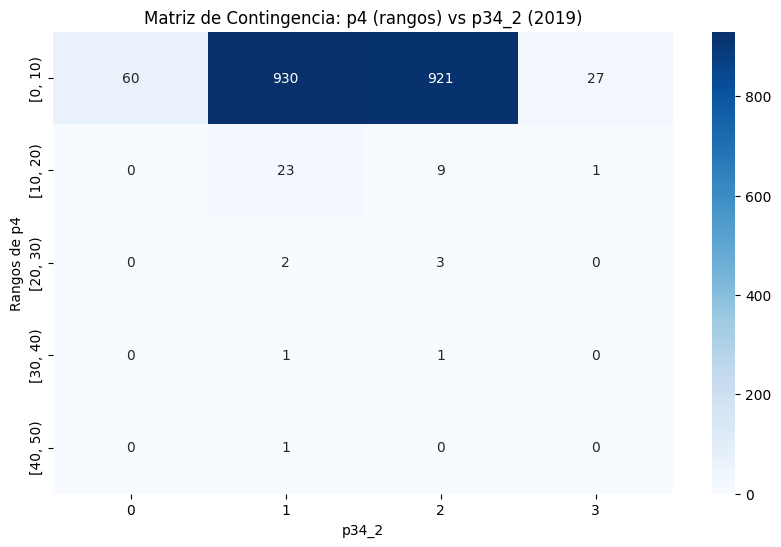

Matriz de contingencia para 2020:
p34_2      0    1    2   3
p4_rango                  
[0, 10)   52  983  899  27
[10, 20)   0   21   11   1
[20, 30)   0    9    2   0
[30, 40)   0    2    0   0
[50, 60)   0    2    0   0


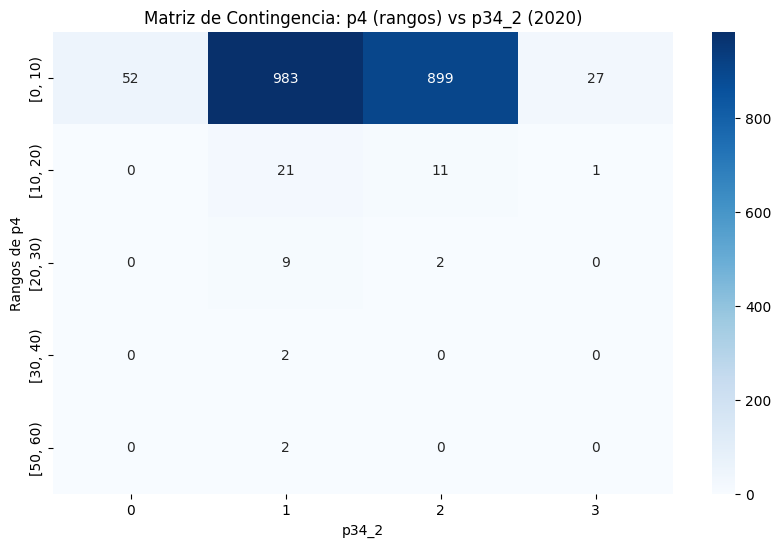

Matriz de contingencia para 2021:
p34_2      0    1    2   3
p4_rango                  
[0, 10)   48  948  874  26
[10, 20)   0   23    7   1
[20, 30)   0    7    3   0
[30, 40)   0    2    1   0
[40, 50)   0    0    1   0
[50, 60)   0    1    2   0


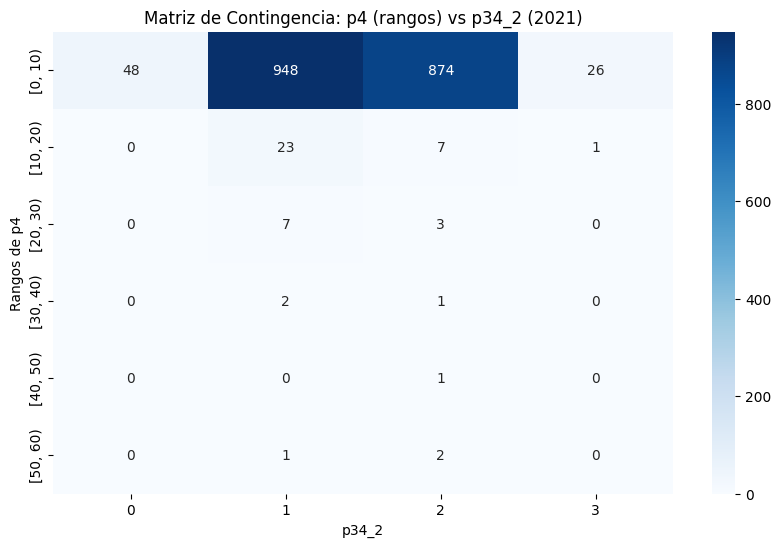

Matriz de contingencia para 2022:
p34_2       0    1    2   3
p4_rango                   
[0, 10)    37  938  925  48
[10, 20)    0   34    9   2
[20, 30)    0    6    3   0
[30, 40)    0    3    2   0
[40, 50)    0    4    1   0
[50, 60)    0    1    1   0
[60, 70)    0    0    0   1
[90, 100)   0    0    1   0


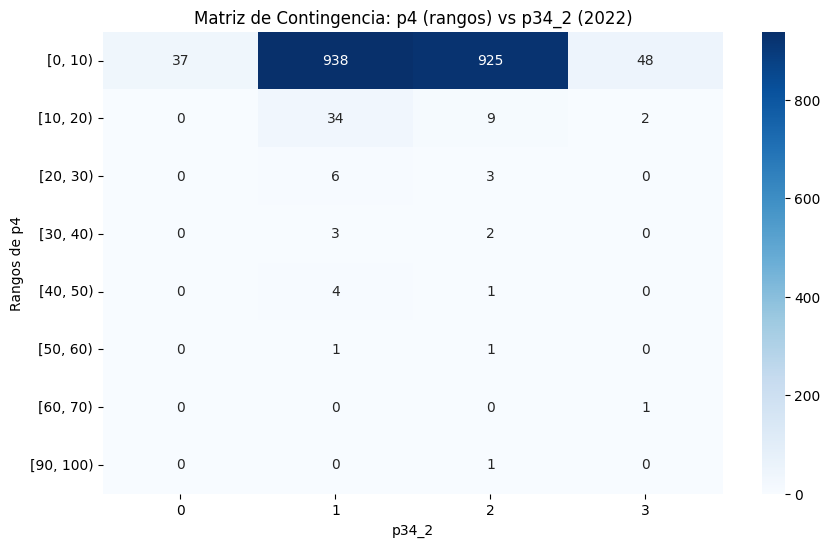

Matriz de contingencia para 2023:
p34_2      0    1    2   3
p4_rango                  
[0, 10)   37  948  939  28
[10, 20)   0   21    9   0
[20, 30)   0    5    2   0
[30, 40)   0    1    2   0
[60, 70)   0    1    1   0
[70, 80)   0    1    0   0


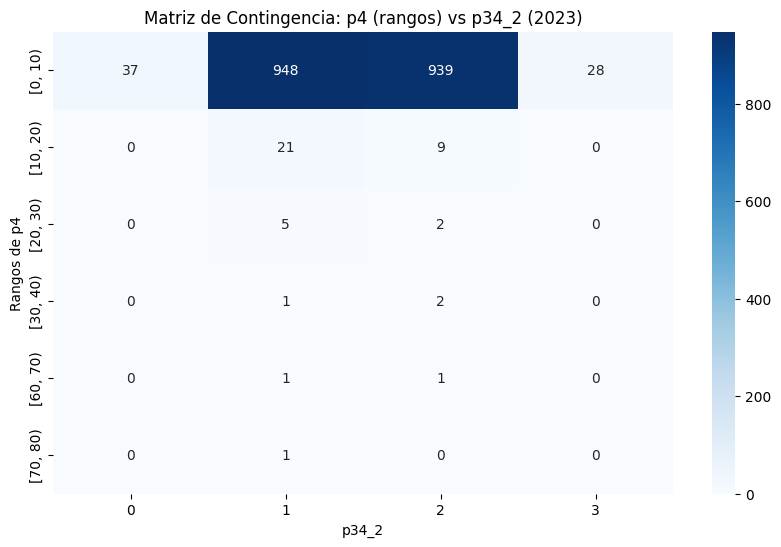

Matriz de contingencia para 2024:
p34_2      0    1    2   3
p4_rango                  
[0, 10)   47  956  950  23
[10, 20)   0   20    8   0
[20, 30)   0    5    1   0
[30, 40)   0    1    2   0
[40, 50)   0    1    0   0
[50, 60)   0    0    1   0


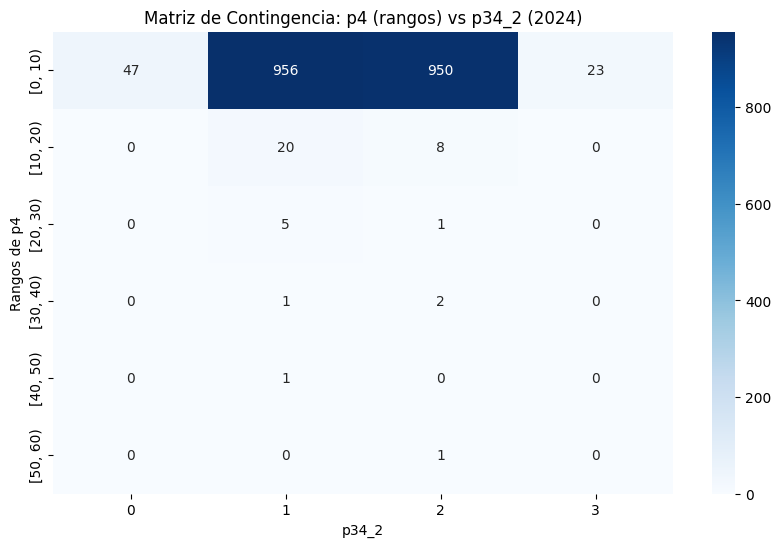

In [ ]:
#Matriz de Contingencia

for anio, df in dataframes.items():
    #Se crearán rangos de 10 en 10 para la variable p4
    df['p4_rango'] = pd.cut(df['p4'], bins=range(0, df['p4'].max() + 10, 10), right=False)
    contingency_table = pd.crosstab(df['p4_rango'], df['p34_2'])

    print(f"Matriz de contingencia para {anio}:")
    print(contingency_table)

    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Contingencia: p4 (rangos) vs p34_2 ({anio})')
    plt.xlabel('p34_2')
    plt.ylabel('Rangos de p4')
    plt.show()